In [1]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import ElasticNet
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import make_pipeline

# Load the dataset
data = pd.read_csv('IMDB Dataset.csv')

# Display the first few rows of the dataset
print(data.head())


                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


How to preprocess the text data and split it into training and testing sets for Sentiment Analysis using Elastic-Net?

In [2]:
# Preprocessing the text data
X = data['review']
y = data['sentiment']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (40000,) (40000,)
Testing set shape: (10000,) (10000,)


How to build a pipeline for Sentiment Analysis using Elastic-Net and train the model?

In [3]:
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import warnings

# Assuming X_train, X_test, y_train, y_test are already defined

# Build a pipeline with CountVectorizer and LogisticRegression
model = make_pipeline(CountVectorizer(), LogisticRegression(max_iter=1000))  # You can adjust the max_iter value

# Train the model
with warnings.catch_warnings():
    warnings.simplefilter("ignore")  # Suppress convergence warnings during training
    model.fit(X_train, y_train)

# Predictions on the test set
y_pred = model.predict(X_test)

# Display the accuracy score
print("Accuracy:", accuracy_score(y_test, y_pred))



Accuracy: 0.8879


How to evaluate the performance of the Elastic-Net model for Sentiment Analysis?

In [4]:
# Display classification report
print("Classification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

    negative       0.89      0.88      0.89      4961
    positive       0.88      0.90      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



How to visualize the distribution of sentiments in the dataset?

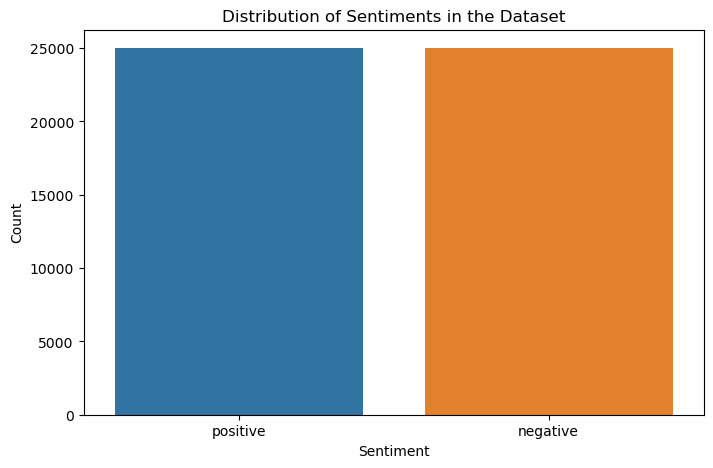

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
# Visualize the distribution of sentiments in the dataset
plt.figure(figsize=(8, 5))
sns.countplot(x='sentiment', data=data)
plt.title('Distribution of Sentiments in the Dataset')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


How to analyze misclassifications and errors made by the Elastic-Net model?

In [8]:
# Analyze misclassifications on the test set
misclassifications = X_test[y_test != y_pred]

# Display a random sample of misclassified reviews
print("Random Sample of Misclassified Reviews:")
print(misclassifications.sample(5))


Random Sample of Misclassified Reviews:
48858    In this episode, a man and his dog go 'coon hu...
31884    The first and only time I saw the woman in bla...
32280    I wandered into this movie after watching the ...
46248    A terrorist attempts to steal a top secret bio...
28131    Rebecca De Mornay can be a fascinating beautif...
Name: review, dtype: object


How to visualize the confusion matrix for the Elastic-Net Sentiment Analysis model?

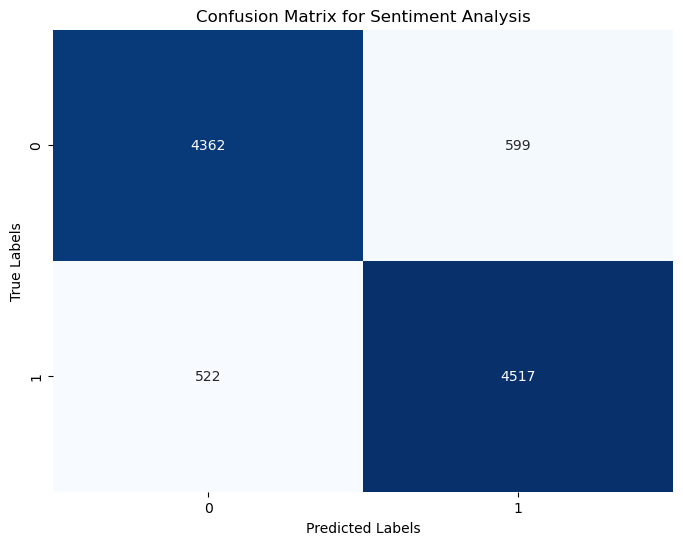

In [9]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for Sentiment Analysis')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


Exploratory Data Analysis (EDA): Analyzing the Distribution of Sentiments

In [17]:
# Display basic statistics of review lengths
data['review_length'] = data['review'].apply(len)
print("Basic Statistics of Review Lengths:")
print(data['review_length'].describe())


Basic Statistics of Review Lengths:
count    50000.000000
mean      1309.431020
std        989.728014
min         32.000000
25%        699.000000
50%        970.000000
75%       1590.250000
max      13704.000000
Name: review_length, dtype: float64


How to visualize the distribution of review lengths for different sentiments?

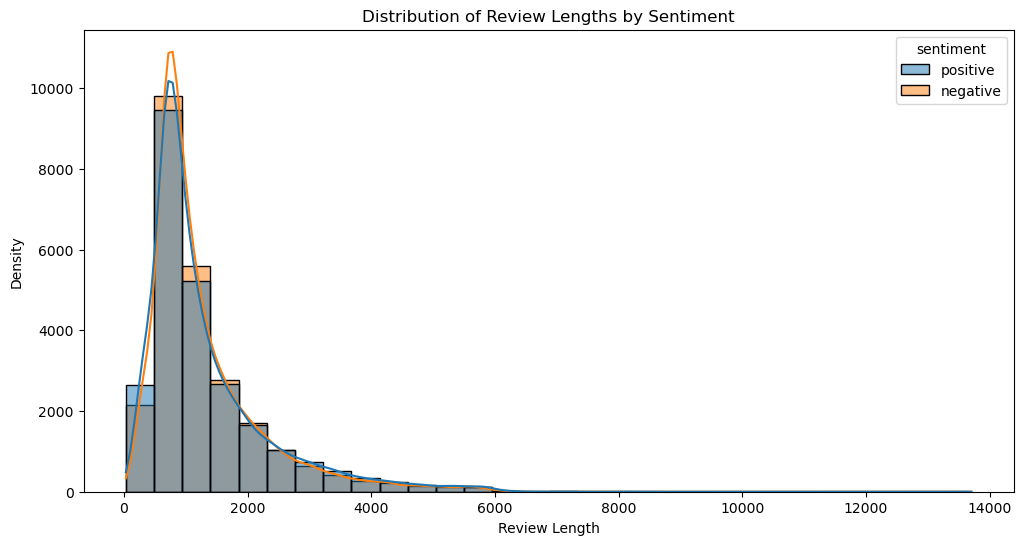

In [20]:
# Visualize the distribution of review lengths for different sentiments
plt.figure(figsize=(12, 6))
sns.histplot(data, x='review_length', hue='sentiment', kde=True, bins=30, common_norm=False)
plt.title('Distribution of Review Lengths by Sentiment')
plt.xlabel('Review Length')
plt.ylabel('Density')
plt.show()


How to create a word cloud to visualize frequent words in positive and negative reviews?

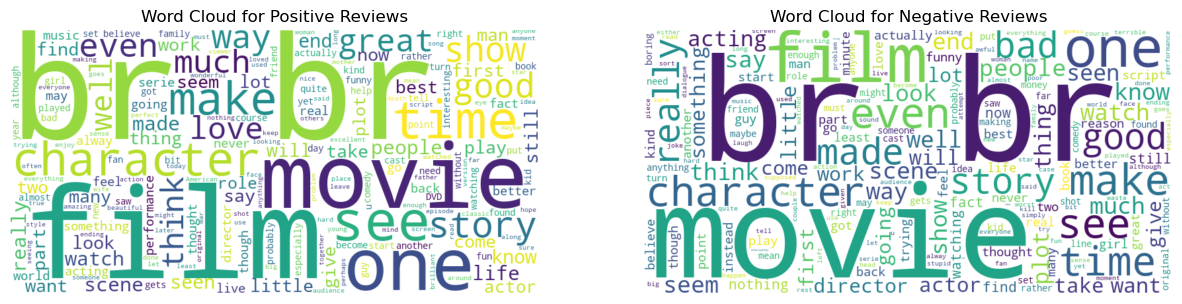

In [23]:
from wordcloud import WordCloud

# Generate a word cloud for positive reviews
positive_reviews = data[data['sentiment'] == 'positive']['review'].str.cat(sep=' ')
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)

# Generate a word cloud for negative reviews
negative_reviews = data[data['sentiment'] == 'negative']['review'].str.cat(sep=' ')
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_reviews)

# Plot the word clouds side by side
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Word Cloud for Positive Reviews')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Word Cloud for Negative Reviews')
plt.axis('off')

plt.show()


How to visualize the sentiment distribution using a pie chart?

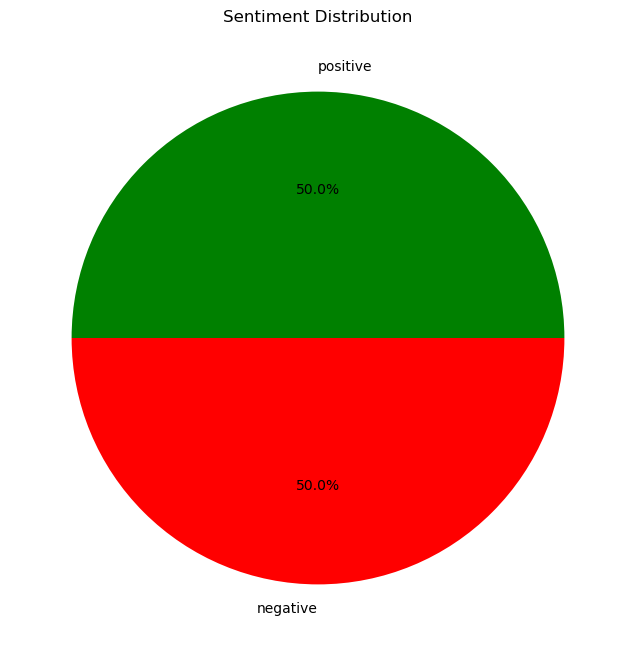

In [30]:
# Visualize the sentiment distribution using a pie chart
sentiment_distribution = data['sentiment'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(sentiment_distribution, labels=sentiment_distribution.index, autopct='%1.1f%%', colors=['green', 'red'])
plt.title('Sentiment Distribution')
plt.show()


How to create a boxplot to compare the distribution of review lengths for different sentiments?

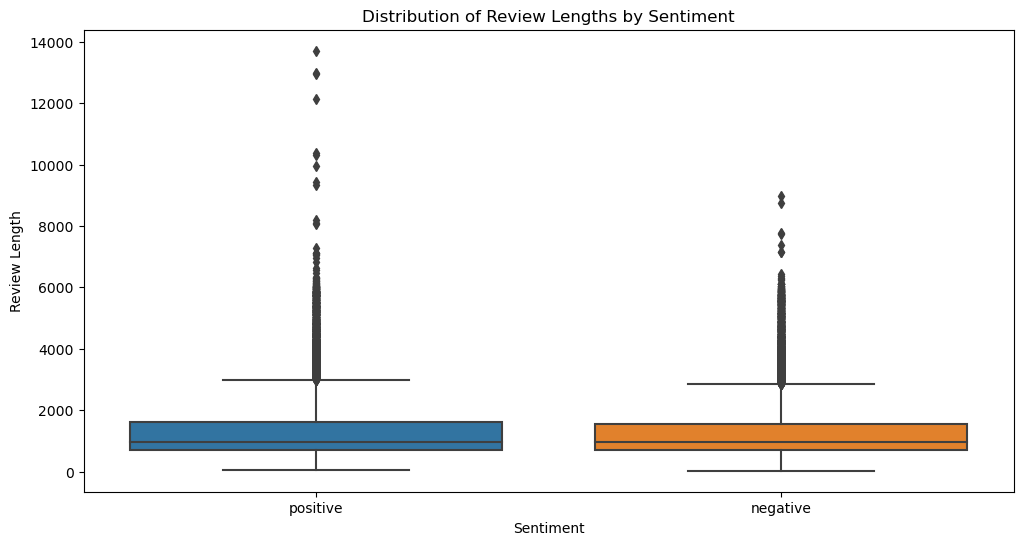

In [32]:
# Create a boxplot to compare the distribution of review lengths for different sentiments
plt.figure(figsize=(12, 6))
sns.boxplot(x='sentiment', y='review_length', data=data)
plt.title('Distribution of Review Lengths by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Review Length')
plt.show()
